# Aim:
Apply K-Means clustering algorithm on some artificial data created by sklearn.


# K-Means:
Unsupervised clustering algorithm that attempts to group points having almost the same features into clusters,
Unsupervised learning means that there is no outcome to be predicted.

# Algorithm:
* Choose a number of Clusters "k". (can use elbow method to decide which k-value to chose)
* Randomly assign each point to a cluster.
* untill the clusters stop changing repeat the following:
    * for each cluster, compute the cluster centroid by taking the mean vector of points in the cluster.
    * Assign each data point to the cluster for which the centroid is the closest.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Create some Data


In [9]:
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs

In [10]:
# Create Data of 200 samples, 2 features, 4 centers which means 4 clusters, etc..
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [11]:
# Contains 2 feature columns for the 200 sample points.
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [12]:
# Contains the labels for each sample point.
# Which shouldn't be known normally in unspervised learning, but this is just an artificial example.
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

# Visualize Data

Text(0, 0.5, 'Feature 2')

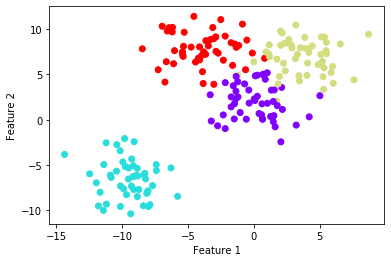

In [13]:
# First feature in the x_axis and second feature in the y_axis
# As u can see there are 4 different colors in our visualization 
# that depends on the 4 different labels that are defined in our data.
plt.scatter(data[0][:,0],data[0][:,1], c=data[1],cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Choosing the best k-value using Elbow Method:

* Compute the sum squared error for some k-values.(i.e get the sum of the squared distance between each member of the cluster and it's centroid).

* Plot k against SSE (you will notice that the error decreases as k gets larger cuz the distortion gets smaller as the number of clusters increase).

* Choose the "k" at which the SSE decreases abruptly (where if you chose a larger value of k the amount of SSE will not decrease that much).



In [14]:
from sklearn.cluster import KMeans

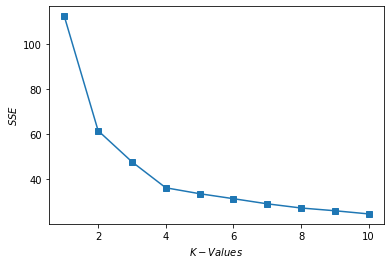

In [15]:
# Use elbow method to find the ideal number of clusters.

sse = []
# For each k-values 1-10 included.
for k in range(1, 11):
    # Train the KMeans model on the 200 sample points with the 2 features.
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data[0])
    
    # Calculate the sum squared error for each of the k-values.
    
    # kmeans.intertia_  gets the sum of distances of samples to their closest cluster center.
    sse.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), sse, marker='s');
plt.xlabel('$K-Values$')
plt.ylabel('$SSE$');

# Notice here that after 4 clusters the SSE does not decrease significantly.

# K-Means Model.

In [16]:
# No. clusters is known to be 4 cuz we created the data but usually we would use the elbow method to get the appropriate "k".
kmeans = KMeans(n_clusters=4)

In [17]:
# Training our data with the 2 features and 200 sample points.
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# The labels assigned to each of the 200 sample points.
kmeans.labels_

array([1, 3, 2, 3, 3, 0, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 2, 3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 0, 2, 2, 1, 3, 2, 0, 1, 2, 2, 1, 3, 0, 3, 0, 1, 3, 2,
       0, 3, 3, 0, 3, 2, 0, 2, 0, 3, 3, 2, 1, 2, 2, 0, 3, 0, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 3, 2, 0, 2, 2, 3, 2, 0, 3, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 1, 3, 1, 3, 2, 0, 3, 0, 1, 1, 3, 2, 0, 1, 1, 1, 1, 2, 3,
       2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 0, 1, 2, 3, 1, 2, 3, 2, 1, 3, 2, 1,
       3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 3, 1, 0, 2, 3, 3,
       0, 2])

In [19]:
# The feature 1, feature 2 coordinates for each of the 4 clusters-centroids.
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

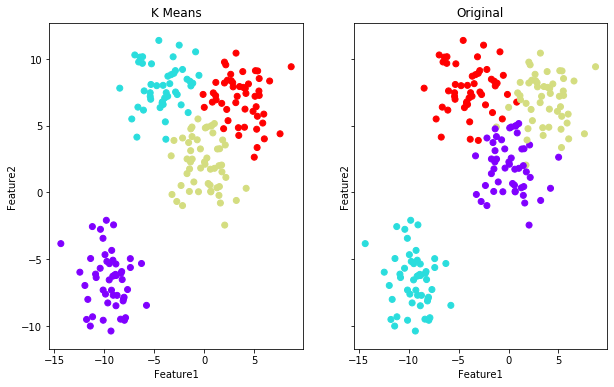

In [20]:
# Setting sharey to True will make y-axis shared among all subplots.
# Plotting the predicted clusters after training the data to get the labels.
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

# plotting the original clusters.
ax2.set_title("Original")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# You should note, the colors are meaningless in reference between the two plots.

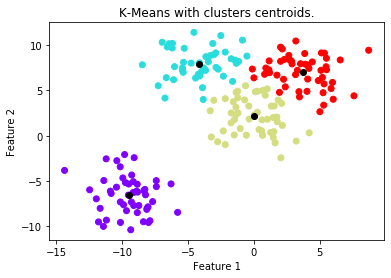

In [21]:
# coloring with respect of the kmeans labels that the K-Means model produced for the 200 sample points.
plt.scatter(data[0][:, 0], data[0][:, 1],c=kmeans.labels_,cmap='rainbow')

# Plotting the centroids of the clusters with their x and y coordinates.
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')
plt.title('K-Means with clusters centroids.')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()